# Deutsch-Jozsa Algorithm

* Understand the Deutsch-Jozsa problem, and classical and quantum algorithms to solve it. 
* Implement the quantum algorithm using Qiskit
* Run it on a simulator and device.

The Deutsch-Jozsa algorithm, first introduced in Reference [1], was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer for a specific, albeit contrived, problem.

## Deutsch-Jozsa Problem <a id='djproblem'> </a>

Suppose a genie gives you an unknown <b>Boolean</b> function $f$ as in a function that takes in a set of bits, and returns either $0$ or $1$.  In math, we would say

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

The property we are interested in about the Boolean function is whether it is <b>"balanced"</b> or <b>"constant"</b>. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. 

The Deutsch-Jozsa problem is, if the genie give you a black box that performs use a function, how can you determine if it is a balanced or constant function?  Further, what is the most efficient algorithm to do so?

## The Classical Solution

While in the best case, a classical algorithm can efficiently determine whether a given function is balanced or constant....but as we learned in computational complexity lab, the best cases can be contrived.

In the worst case, if you ran the optimal classical algorithm and continue to see the same output for each input bit string we try, we must check exactly half of all possible inputs plus one in order to be certain that $f(x)$ is constant. Since the total number of possible inputs is $2^n$ (Each bit in the string can be a 0 or a 1), this implies that we must check $2^{n-1}+1$ inputs to know if $f(x)$ is constant. 

For example, for a $4$-bit string, if we checked $8$ out of the $16$ possible combinations, and for them we find

   $0000\rightarrow 0$
    
   $0001\rightarrow 0$
    
   $0010\rightarrow 0$
    
   $0011\rightarrow 0$
    
   $0100\rightarrow 0$
    
   $0101\rightarrow 0$
    
   $0110\rightarrow 0$
    
   $0111\rightarrow 0$


 it is still possible that the $9^\textrm{th}$ and every remaining input would have returned a $1$. In this case $f(x)$ would still be balanced.

Probabilistically, this is a very unlikely event. In fact, if we get the same result continually in succession, we can express the probability that the function is constant as a function of $k$ inputs as:



$$ P_\textrm{constant}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } 1 < k \leq 2^{n-1}$$



For a stochastic algorithm, we could opt to truncate our algorithm early if we wanted to accept not being absolutely certain, but x% confident. If we want to be 100% confident and use a deterministic algorithm, we must check $2^{n-1}+1$ inputs.

Does this follow your intuition?  This could be related to an analogy in gambling by asking the following: 

Suppose your shady friend tries to get you to bet on the outcome of a coin flip. You are allowed to practice with the coin as many times as you want. How many times in a row $k$ would the coin need to come up only heads for you to accuse your friend of cheating?

In the cell below, can you <b>determine the number of coin flips $k$</b> such that you could have at least <b>99% confidence</b> the coin only comes up heads?

## Quantum Solution

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$ by mapping the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$. Below is the generic circuit for the Deutsch-Jozsa algorithm.

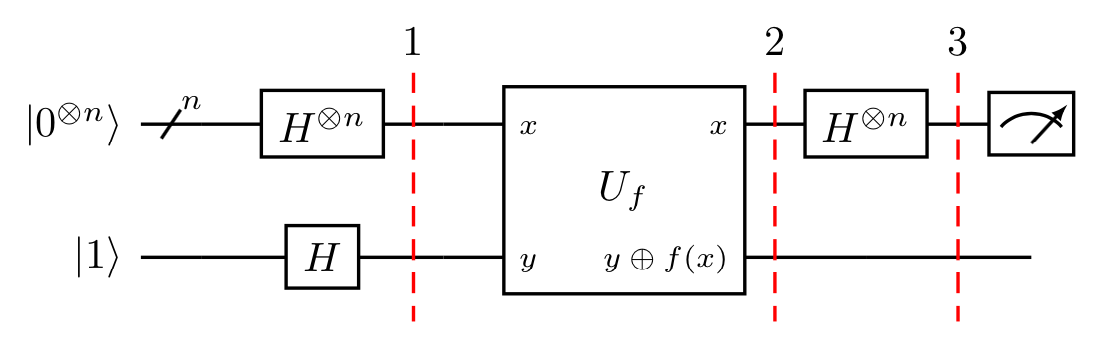

The way to read the big $U$ black box is that it takes in $x$ and $y$ and returns $x$ and $y\bigoplus f(x)$ in the given qubits that these expressions are aligned with.

Now, let's go through the steps of the algorithm:

<ol>
   <li>
        Prepare two quantum registers. The first is an $n$-qubit register initialized to $|0\rangle$, and the second is a one-qubit register initialized to $|1\rangle$:
        

$$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$


   </li>
    
   <li>
        Apply a Hadamard gate to each qubit:
        

$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$


   </li>
   
   <li>
        Apply the quantum oracle which knows what the function is you would like to learn. This results in $\vert x\rangle \vert y\rangle$ to taking $\vert x\rangle \vert y \oplus f(x)\rangle$:
      
  $\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle)
         $
       
<b>Here is where the magic happens!</b> Since for each $x,f(x)$ is either $0$ or $1$, the second qubit is only in two possible states:
      If $f(x)=0$ then the second qubit is $|0\rangle - |1\rangle$
      If $f(x)=1$ then the second qubit is $|1\rangle - |0\rangle=-(|0\rangle - |1\rangle)$ thus
       
  $\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle )$
       

   </li>

   <li>
       Now, the second, single qubit register no longer matters. Apply a Hadamard gate to each qubit in the first register:
        $$
        \begin{aligned}
            \lvert \psi_3 \rangle 
                & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                    \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} 
                    \vert y \rangle \right] \\
                & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot y} \right]
                    \vert y \rangle
        \end{aligned}
        $$
       
where $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.
   </li>

   <li>
       Measure the first register. Notice that the probability of measuring $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \rvert^2$, which evaluates to $1$ if $f(x)$ is constant and $0$ if $f(x)$ is balanced. 
   </li>

</ol>

### 1.4 Why Does This Work? <a id='why-does-this-work'> </a>

- **Constant Oracle**

When the oracle is *constant*, it has no effect (up to a global phase) on the input qubits, and the quantum states before and after querying the oracle are the same. Since the H-gate is its own inverse, in Step 4 we reverse Step 2 to obtain the initial quantum state of $|00\dots 0\rangle$ in the first register.

$$
H^{\otimes n}\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\quad \xrightarrow{\text{after } U_f} \quad
H^{\otimes n}\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
= 
\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
$$

- **Balanced Oracle**

After step 2, our input register is an equal superposition of all the states in the computational basis. When the oracle is *balanced*, phase kickback adds a negative phase to exactly half these states:

$$
U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} -1 \\ 1 \\ -1 \\ \vdots \\ 1 \end{bmatrix}
$$


The quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, in Step 4, when applying the H-gates, we must end up with a quantum state that is orthogonal to $|00\dots 0\rangle$. This means we should never measure the all-zero state. 


## 2. Worked Example  <a id='example'></a>

Let's go through a specific example for a two bit balanced function: 

<ol>
    <li> The first register of two qubits is initialized to $|00\rangle$ and the second register qubit to $|1\rangle$ 
        
(Note that we are using subscripts 1, 2, and 3 to index the qubits. A subscript of "12" indicates the state of the register containing qubits 1 and 2)
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{12} \otimes \lvert 1 \rangle_{3} $$

 
   </li>
    
   <li> Apply Hadamard on all qubits
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{12} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{3}  $$

 
   </li>
    
   <li> The oracle function can be implemented as $\text{Q}_f = CX_{13}CX_{23}$, 
       $$
       \begin{align*}
            \lvert \psi_2 \rangle =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{12} \otimes \left( \lvert 0 \oplus 0 \oplus 0 \rangle - \lvert 1 \oplus 0 \oplus 0 \rangle \right)_{3} \\
                  + \lvert 0 1 \rangle_{12} \otimes \left( \lvert 0 \oplus 0 \oplus 1 \rangle - \lvert 1 \oplus 0 \oplus 1 \rangle \right)_{3} \\
                  + \lvert 1 0 \rangle_{12} \otimes \left( \lvert 0 \oplus 1 \oplus 0 \rangle - \lvert 1 \oplus 1 \oplus 0 \rangle \right)_{3} \\
                  + \lvert 1 1 \rangle_{12} \otimes \left( \lvert 0 \oplus 1 \oplus 1 \rangle - \lvert 1 \oplus 1 \oplus 1 \rangle \right)_{3} \right]
        \end{align*}
        $$
   </li>
    
   <li>Simplifying this, we get the following: 
       $$
       \begin{aligned}
        \lvert \psi_2 \rangle & = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{12} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{3} - \lvert 0 1 \rangle_{12} \otimes \left( \lvert 0 \rangle - \lvert  1 \rangle \right)_{3} - \lvert 1 0 \rangle_{12} \otimes \left( \lvert 0  \rangle - \lvert 1 \rangle \right)_{3} + \lvert 1 1 \rangle_{12} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{3}  \right] \\
        & = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{12} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{3} \\
        & = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{1} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{3}
        \end{aligned}
        $$
   </li>
    
   <li> Apply Hadamard on the first register
        

$$ \lvert \psi_3\rangle = \lvert 1 \rangle_{1} \otimes \lvert 1 \rangle_{2} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{3} $$


   </li>
   
   <li> Measuring the first two qubits will give the non-zero $11$, indicating a balanced function.
   </li>
</ol>

You can try out similar examples using the widget below. Press the buttons to add H-gates and oracles, re-run the cell and/or set `case="constant"` to try out different oracles.

In [1]:
from qiskit_textbook.widgets import dj_widget
dj_widget(size="small", case="balanced")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x00\xcc\x08\x06\x00\x00\x00;\xd7\x9c…

## 3. Creating Quantum Oracles <a id='creating-quantum-oracles'> </a>

Let's see some different ways we can create a quantum oracle. 

For a constant function, it is simple:

$\qquad$ 1. if f(x) = 0, then apply the $I$ gate to the qubit in register 2.  
$\qquad$ 2. if f(x) = 1, then apply the $X$ gate to the qubit in register 2.

For a balanced function, there are many different circuits we can create. One of the ways we can guarantee our circuit is balanced is by performing a CNOT for each qubit in register 1, with the qubit in register 2 as the target. For example:




<b>IMAGE 1 HERE!!! Go to SLACK, Sorry</b>

In the image above, the top three qubits form the input register, and the bottom qubit is the output register. We can see which input states give which output in the table below:

| Input states that output 0 | Input States that output 1 |
|:--------------------------:|:--------------------------:|
|             000            |             001            |
|             011            |             100            |
|             101            |             010            |
|             110            |             111            |


We can change the results while keeping them balanced by wrapping selected controls in X-gates. For example, see the circuit and its results table below:

<b>IMAGE 2 HERE!!! Go to SLACK, Sorry</b>

| Input states that output 0 | Input states that output 1 |
|:--------------------------:|:--------------------------:|
|             001            |             000            |
|             010            |             011            |
|             100            |             101            |
|             111            |             110            |

In the image above, the top three qubits form the input register, and the bottom qubit is the output register. We can see which input states give which output in the table below:

| Input states that output 0 | Input States that output 1 |
|:--------------------------:|:--------------------------:|
|             000            |             001            |
|             011            |             100            |
|             101            |             010            |
|             110            |             111            |


We can change the results while keeping them balanced by wrapping selected controls in X-gates. For example, see the circuit and its results table below:


## 4. Qiskit Implementation <a id='implementation'></a>

We now implement the Deutsch-Jozsa algorithm for the example of a three-bit function, with both constant and balanced oracles. First let's do our imports:

In [2]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

## Defining a Constant Oracle
Let's start by creating a constant oracle, in this case the input should have no effect on the output so you should just randomly set the output qubit to be 0 or 1:

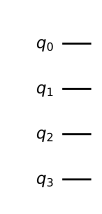

In [4]:
# set the length of the n-bit input string. 
n = 3

#Define a circuit for an n-qubit input string plus 1 extra qubit
const_oracle = QuantumCircuit(n+1)

#This line defines the f(x).  To define it, we want to randomly sample from the integers 0 and 1
output = ??????????

#Here, we check what f(x) is, and if it is 1, we apply the X-gate to the additional qubit such that
# the |+> state goes to |->
if output == 1:
    ???????????????
    
const_oracle.draw()

## Balanced Oracle

Next, we create a balanced oracle. We can create a balanced oracle by performing CNOTs with each input qubit as a control and the output bit as the target. We can vary which particular input states give 0 or 1 by wrapping some of the controls in X-gates. We need a string of length `n` which determines which CNOTS are wrapped by Xs.

With this string, we can use it as a key to place our X-gates. For each qubit in our circuit, we place an X-gate if the corresponding digit in `b_str` is `1`, or do nothing if the digit is `0`.

Next, we need to put our controlled-NOT gates, using each input qubit as a control, and the output qubit as a target.

Finally, we repeat the code from two cells up to finish wrapping the controls in X-gates.

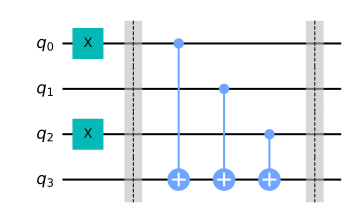

In [8]:
# Define the variable balanced_oracle to be a QuantumCircuit that takes in n+1 qubits.
balanced_oracle = ?????

# Define the variable b_str to be a string. For now, use the string "101"
b_str = ?????

# Here, we want to put an x gate down whenever the bit in the string is a 1.
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        #Here you should apply an x gate to the current qubit in the for loop
    

# Use barrier as divider
balanced_oracle.barrier()

# Here we want to apply a CNOT controlled by a each qubit in the for loop. You should always target the last qubit


# Use barrier as divider


# Here, you should repeat the code where you loop over all qubits in your b_str and apply x gates to them
#if the bit is a 1
????????????

# Show oracle
balanced_oracle.draw()


We have just created a balanced oracle! All that's left to do is see if the Deutsch-Jozsa algorithm can solve it.

### 4.3 The Full Algorithm <a id='full_alg'></a>

Let's now put everything together. This first step in the algorithm is to initialize the input qubits in the state $|{+}\rangle$ and the output qubit in the state $|{-}\rangle$:

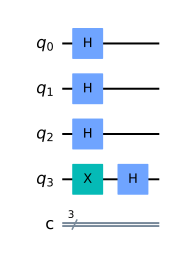

In [10]:
dj_circuit = QuantumCircuit(n+1, n)

# Creat a for loop and apply H-gates to all but the last qubit (as in use the range(n) for your loop)

# Put the last qubit in state |->

# Add the balance oracle to your circuit
dj_circuit += ?????????

# Repeat H-gates over all the qubits


# Measure the input qubits (again, use the range(n) and a for loop).  To measure, you should use the function 
# dj_circuit.measure(qubit, classical_bit).  In your case the two inputs should both be the same...as in
# dj_circuit.measure(1,1),dj_circuit.measure(2,2),etc.

# Display circuit
dj_circuit.draw()

Now, run the code for your constant oracle and see what happens in the next cell